### 2. **Travelling Salesman**: the file cities.npy contains the 2D coordinates $P_1, . . . , P_{1000}$ of N = 1000 cities. Find a permutation σ(1), . . . , σ(N) of these N cities that minimises the total length L defined as  
### $L = ∥P_{σ(2)} − P_{σ(1)}∥ + ∥P_{σ(3)} − P_{σ(2)}∥ + . . . + ∥P_{σ(N)} − P_{σ(N−1)}∥ + ∥P_{σ(1)} − P_{σ(N)}∥.$  
### Note that L is the length of a tour that visits each city once and comes back to the initial city.

In [27]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.spatial.distance import cdist
from algos.greedy import Graph
from algos.nn import solver_nearest_neighbours
from algos.christofides import Christofides

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
cities = np.load("cities.npy", allow_pickle = True)

Text(0, 0.5, '$y$')

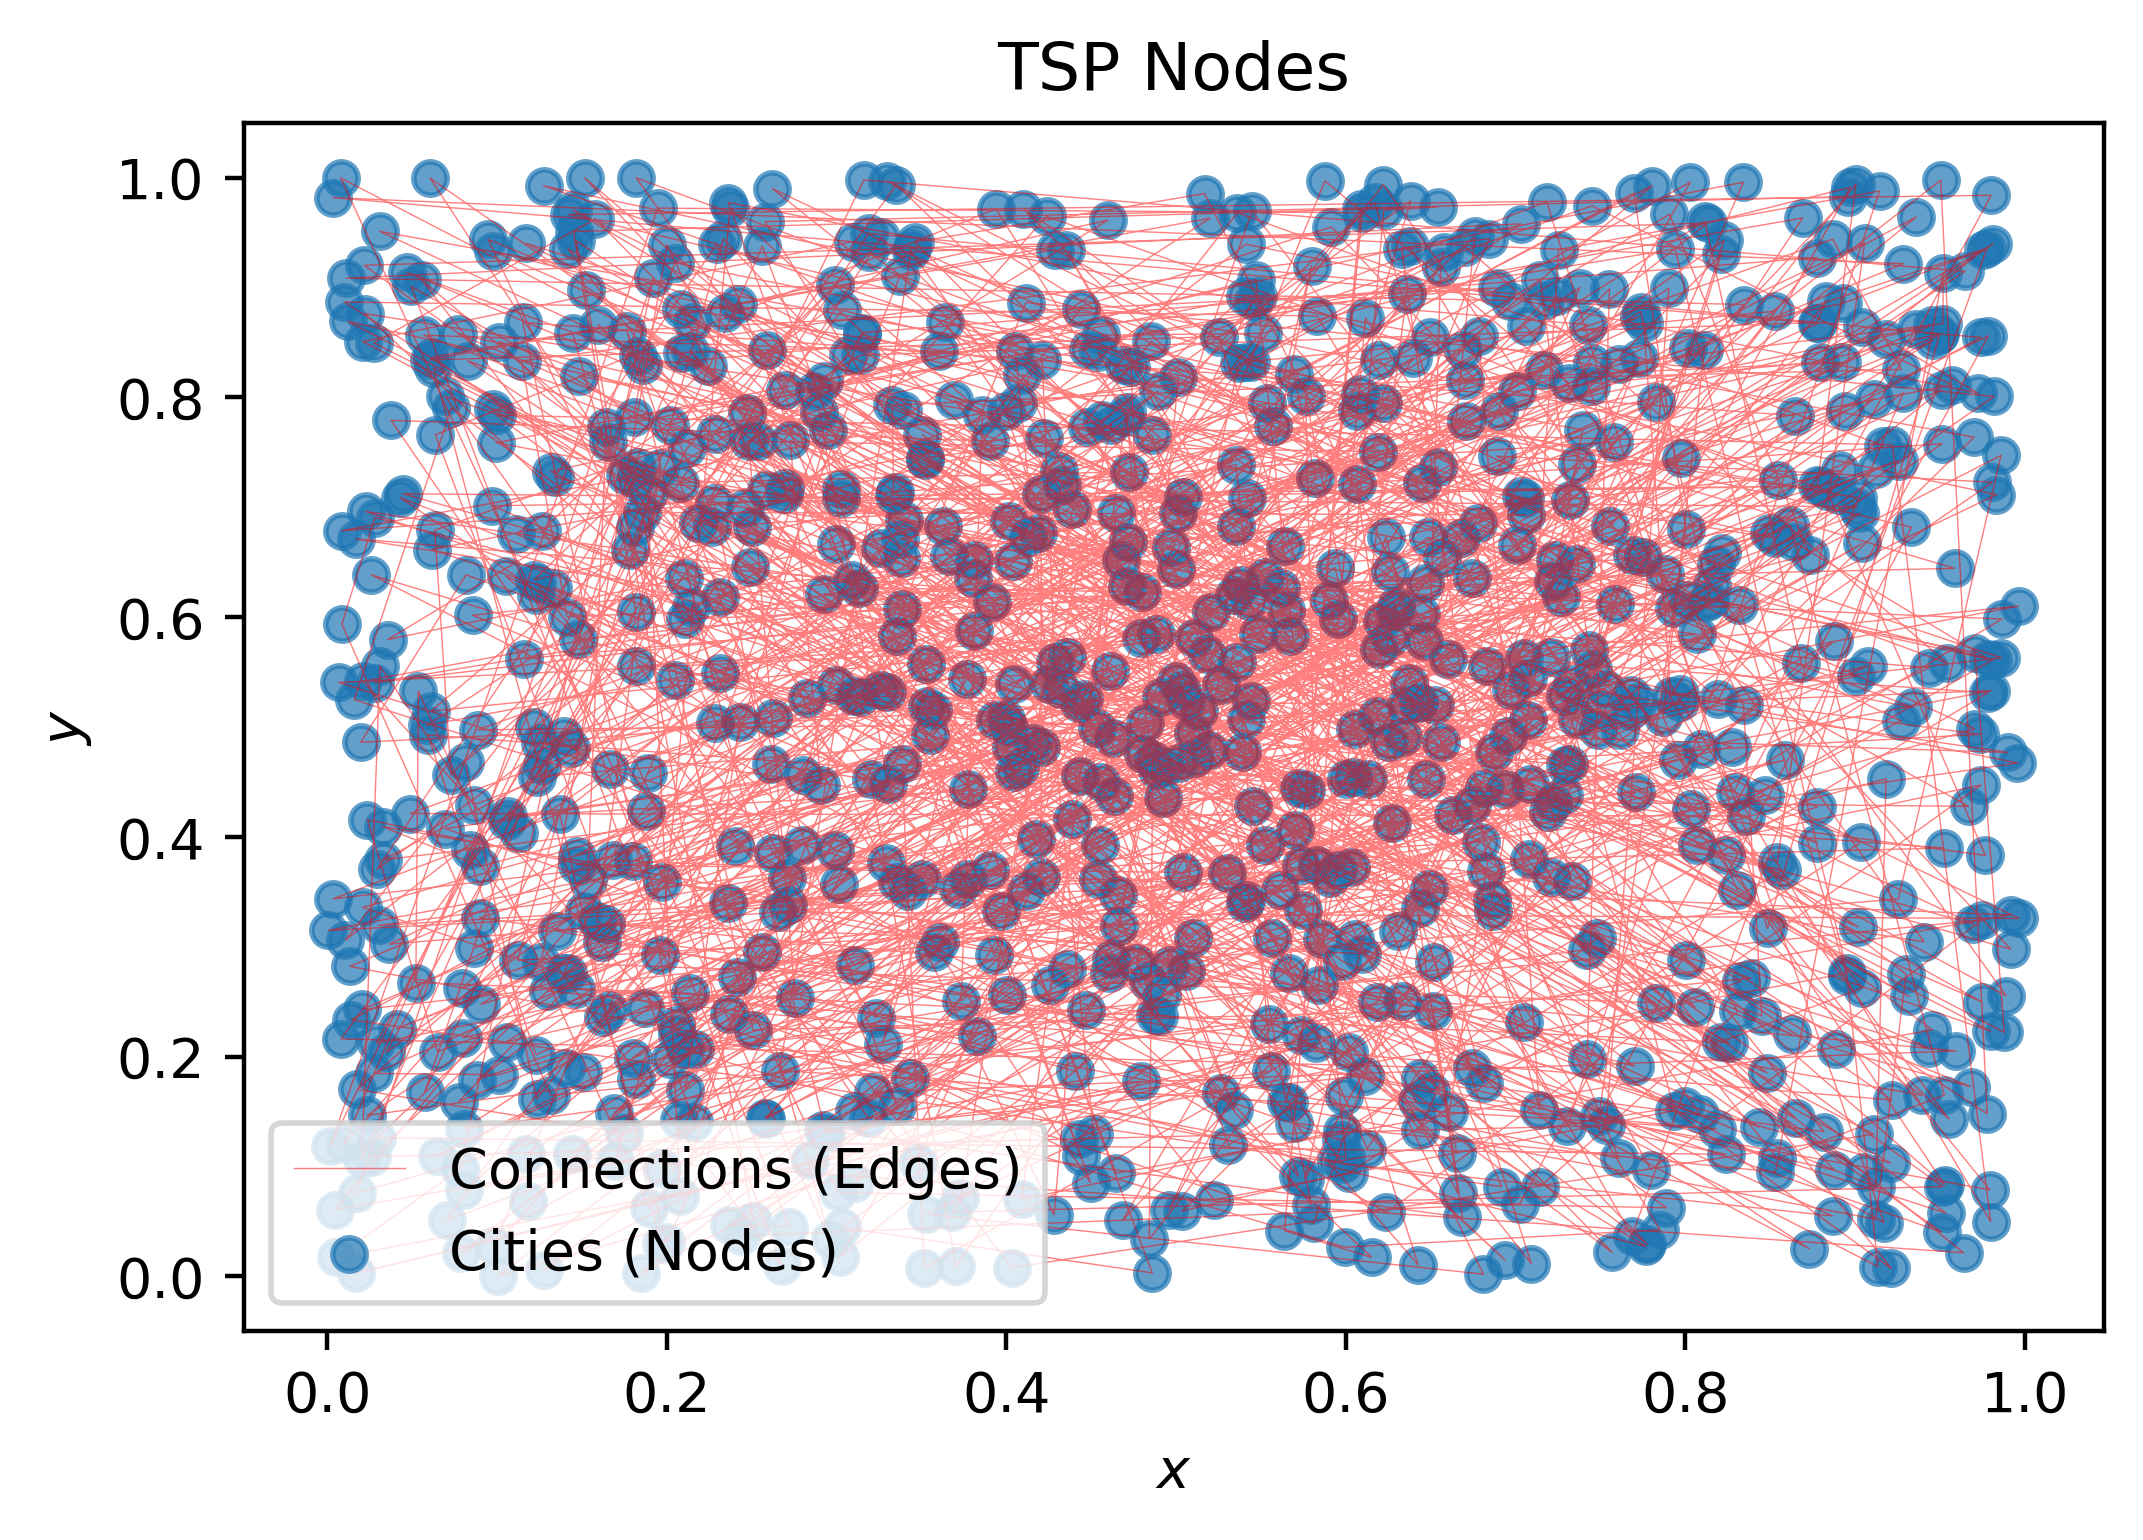

In [14]:
# visualise the nodes
plt.figure(dpi=400)
plt.scatter(cities[:,0], cities[:,1], alpha=0.7, label="Cities (Nodes)")
plt.plot(cities[:,0], cities[:,1], alpha=0.5, color="red", linewidth=0.25, label="Connections (Edges)")
plt.legend()
plt.title("TSP Nodes");plt.xlabel("$x$");plt.ylabel("$y$")

In [15]:
dist_matrix = cdist(cities, cities)
dist_matrix, dist_matrix.shape

(array([[0.        , 0.34838355, 0.38578866, ..., 0.61873281, 0.39415652,
         0.41012412],
        [0.34838355, 0.        , 0.39901093, ..., 0.41217627, 0.41862477,
         0.54573393],
        [0.38578866, 0.39901093, 0.        , ..., 0.32290609, 0.02020306,
         0.18089399],
        ...,
        [0.61873281, 0.41217627, 0.32290609, ..., 0.        , 0.33504518,
         0.49202713],
        [0.39415652, 0.41862477, 0.02020306, ..., 0.33504518, 0.        ,
         0.16344243],
        [0.41012412, 0.54573393, 0.18089399, ..., 0.49202713, 0.16344243,
         0.        ]]),
 (1000, 1000))

## Nearest Neighbours

In [16]:
min_route, min_dist = solver_nearest_neighbours(dist_matrix, random=False) 
min_dist

28.937238608461758

In [17]:
best_cities = cities.copy()
for index in range(1000):
    city_copy = cities.copy()
    
    store = city_copy[0].copy()
    city_copy[0] = city_copy[index].copy()
    city_copy[index] = store
    
    dist_matrix_copy = cdist(city_copy, city_copy)
    
    new_route, new_dist = solver_nearest_neighbours(dist_matrix_copy, random=False) 
    if new_dist < min_dist:
        print(new_dist)
        min_dist = new_dist
        min_route = new_route
        best_cities = city_copy.copy()

28.7891791712778
28.484368104659634
28.170166703582268
28.112471458255822
28.089023976830752
28.07166853559722
27.993855556967723
27.941078133945727
27.93683540049367


In [18]:
best_route = np.asarray([[best_cities[pos][0], best_cities[pos][1]]   for pos in min_route])

Text(0, 0.5, '$y$')

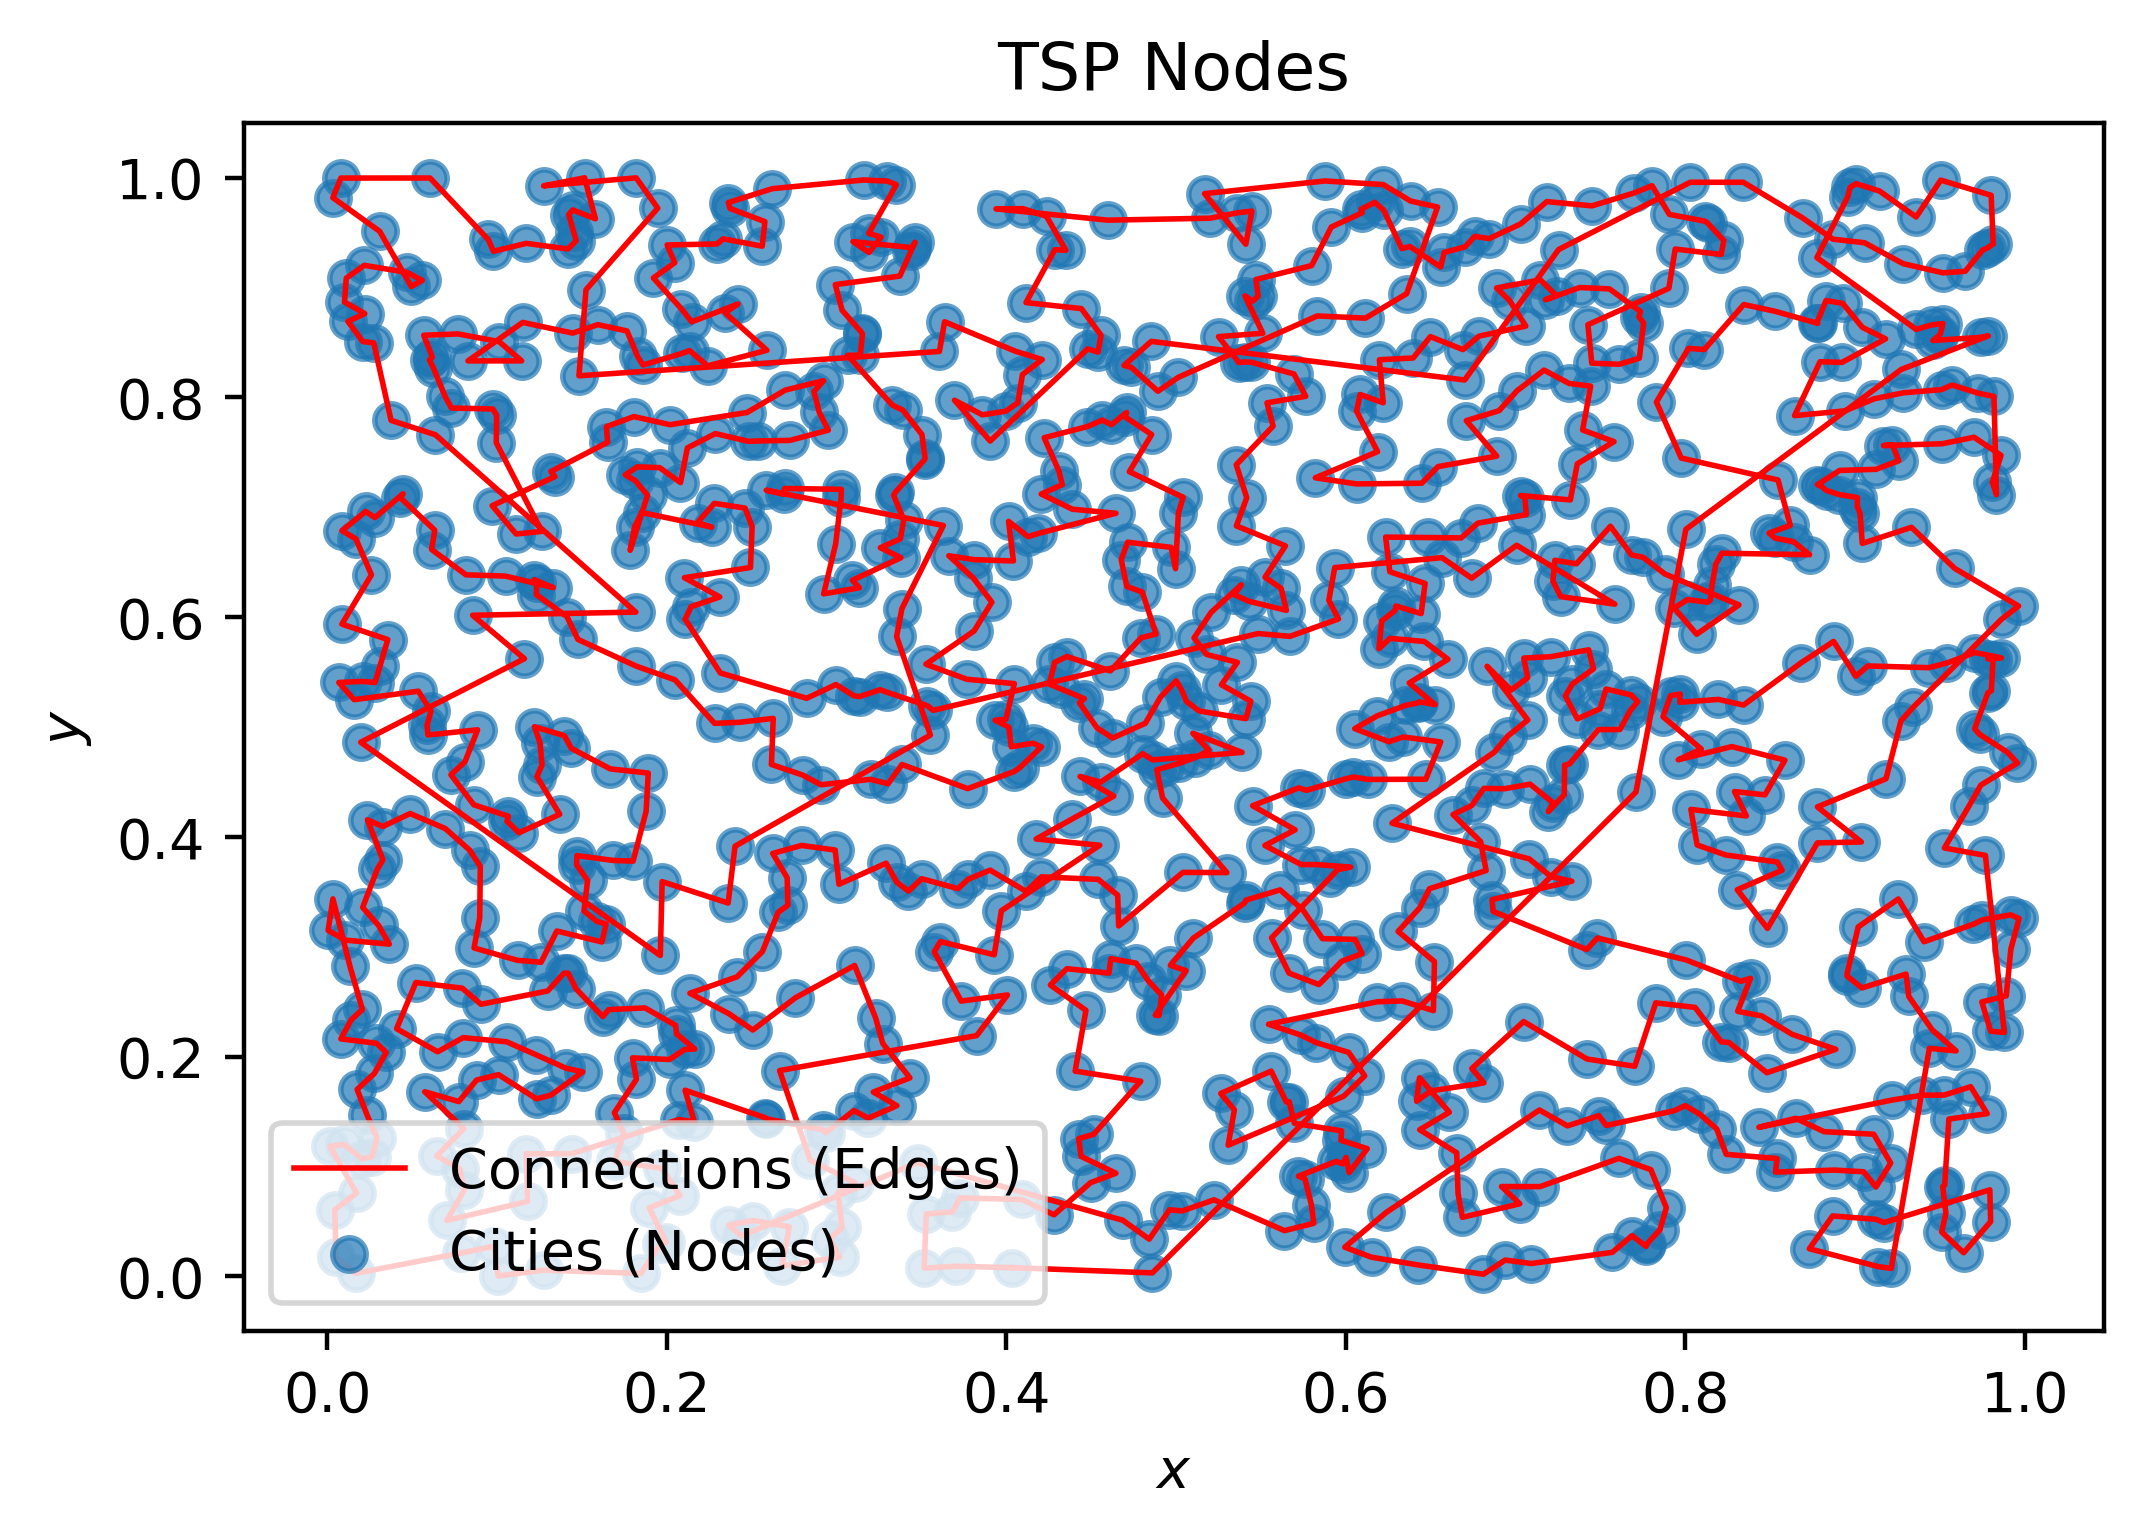

In [19]:
# visualise the best route
plt.figure(dpi=400)
plt.scatter(cities[:,0], cities[:,1], alpha=0.7, label="Cities (Nodes)")
plt.plot(best_route[:,0], best_route[:,1], alpha=1, color="red", linewidth=1, label="Connections (Edges)")
plt.legend()
plt.title("TSP Nodes");plt.xlabel("$x$");plt.ylabel("$y$")

## Greedy

In [20]:
graph = Graph(cities.copy())

In [21]:
dist, edges, route = graph.tsp()

In [22]:
dist

26.528508254434513

In [23]:
best_route = np.asarray([[cities[pos][0], cities[pos][1]]   for pos in route])

Text(0, 0.5, '$y$')

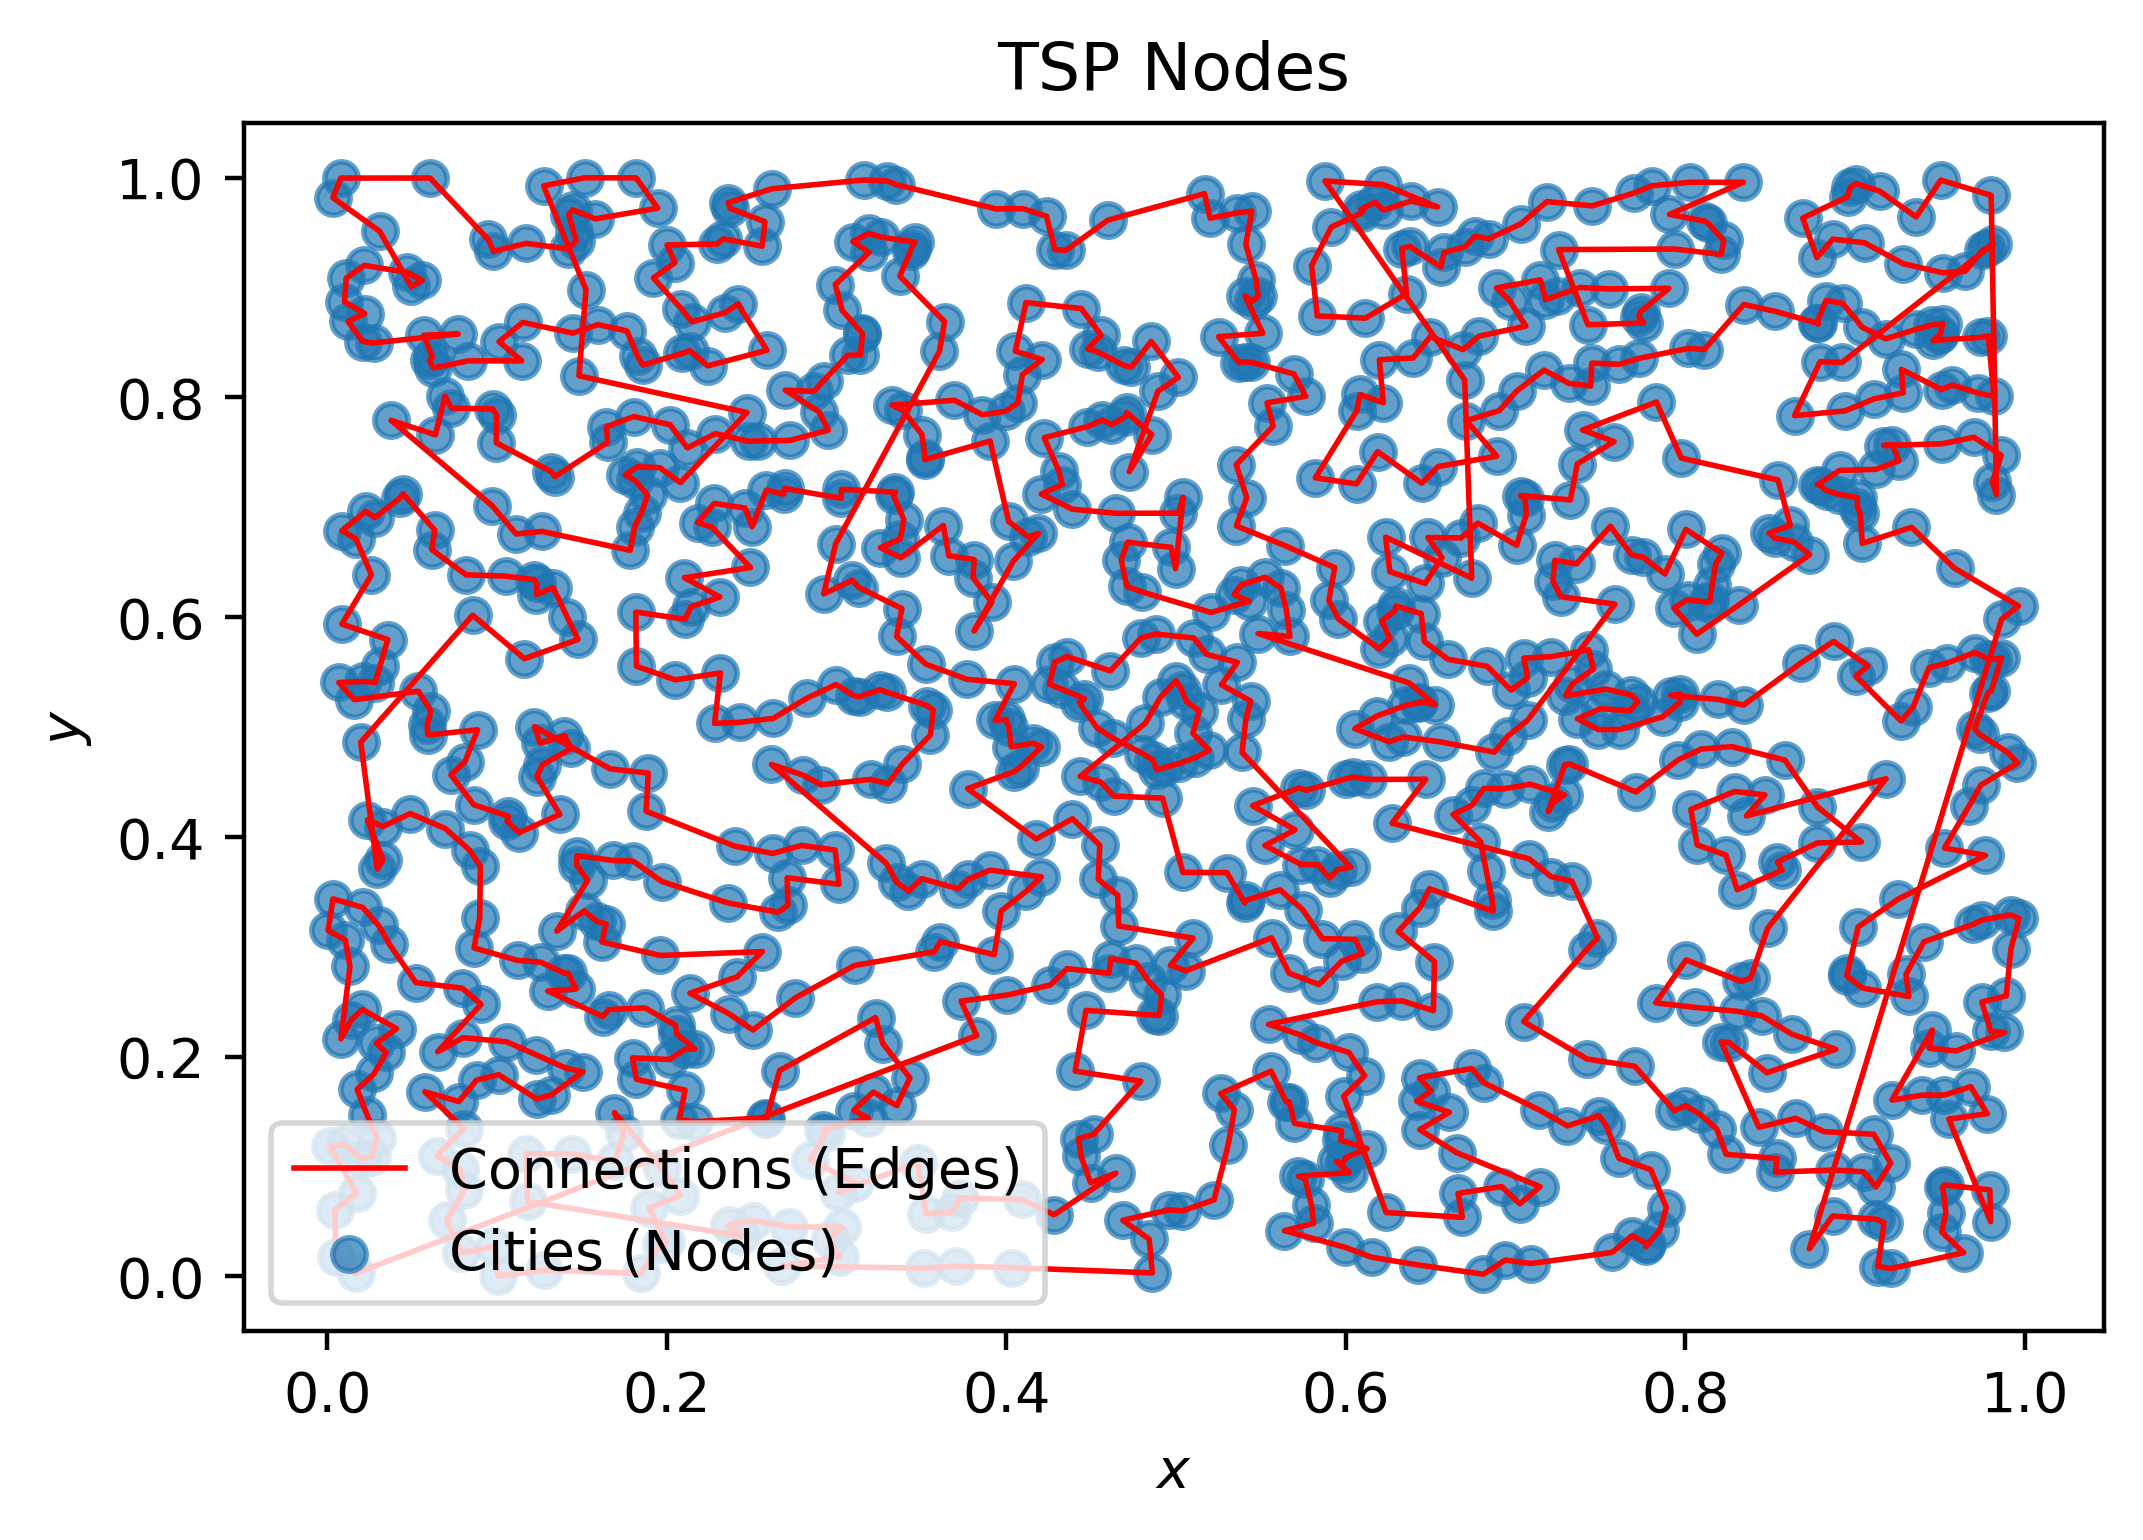

In [24]:
# visualise the best route
plt.figure(dpi=400)
plt.scatter(cities[:,0], cities[:,1], alpha=0.7, label="Cities (Nodes)")
plt.plot(best_route[:,0], best_route[:,1], alpha=1, color="red", linewidth=1, label="Connections (Edges)")
plt.legend()
plt.title("TSP Nodes");plt.xlabel("$x$");plt.ylabel("$y$")

Christofide

In [28]:
graph = Christofides(cities.copy())

In [ ]:
route, dist = graph.tsp()
dist

In [ ]:
best_route = np.asarray([[cities[pos][0], cities[pos][1]]   for pos in route])

In [ ]:
# visualise the best route
plt.figure(dpi=400)
plt.scatter(cities[:,0], cities[:,1], alpha=0.7, label="Cities (Nodes)")
plt.plot(best_route[:,0], best_route[:,1], alpha=1, color="red", linewidth=1, label="Connections (Edges)")
plt.legend()
plt.title("TSP Nodes");plt.xlabel("$x$");plt.ylabel("$y$")